In [1]:
!git clone -b dev-rose https://github.com/Finweto/Projet-deep-learning-2022.git

Cloning into 'Projet-deep-learning-2022'...
remote: Enumerating objects: 2285, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2285 (delta 2), reused 4 (delta 2), pack-reused 2278
Receiving objects: 100% (2285/2285), 1.57 GiB | 27.76 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Checking out files: 100% (2656/2656), done.


In [2]:
# Imports
import itertools
import os
import pathlib
import random
import typing

import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import sklearn.utils
import sklearn.metrics
import tensorflow.keras as keras
import tensorflow as tf

In [3]:
################################################ Paramètres GLOBAUX ############################################
nodes = 15   # Number of nodes in the simple models
l_rate = 0.0001   # Learning rate
ep = 30    # Epochs

label_names1 = ["dente", "lisse"]
label_names2 = ["oppose", "alterne"]
label_names3 = ["composee", "simple"]
label_names4 = ["non", "oui"]

path_train_data = "Projet-deep-learning-2022/data_train_labeled_v3.csv"
path_test_data = "Projet-deep-learning-2022/data_test_labeled_v3.csv"

#                                                     MODELE 1 : Bords lisses ou dentés

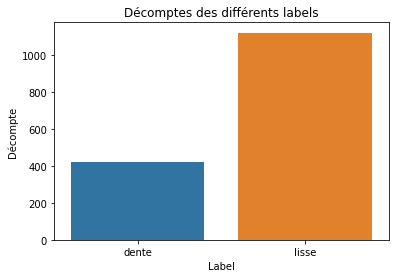

In [4]:
################################################ MODELE 1 : BORDS ##############################################

## CHOIX DE LA FEATURE :
label_names = label_names1 # Le 2ème élement du tableau sera celui converti en "1", le premier sera converti en 0
feature = "bord"



# Récupération des données préparées

def get_images(filename, feature): # Retourne un tableau d'images labellisées seulement selon la feature voulue

  df=pd.read_csv(filename)
  images = []
  labels = []

  for i in range(len(df[feature])):
    path=df["img_path"][i]

    image=cv2.imread("Projet-deep-learning-2022/"+path)
    image=cv2.resize(image,(150,150))
    images.append(image)


    ########## On convertit la réponse texte en valeur numérique
    if df[feature][i]==label_names[1]:
      label = 1
    else:
      label = 0
    
    labels.append(label)

    # Mélange des tableaux si besoin
    # images, labels = sklearn.utils.shuffle(images, labels)
  return images,labels



images, labels= get_images(path_train_data, feature)


data_train_labeled=pd.read_csv(path_train_data)
seaborn.countplot(x=data_train_labeled[feature])
plt.title("Décomptes des différents labels")
plt.ylabel("Décompte")
plt.xlabel("Label")
plt.show()

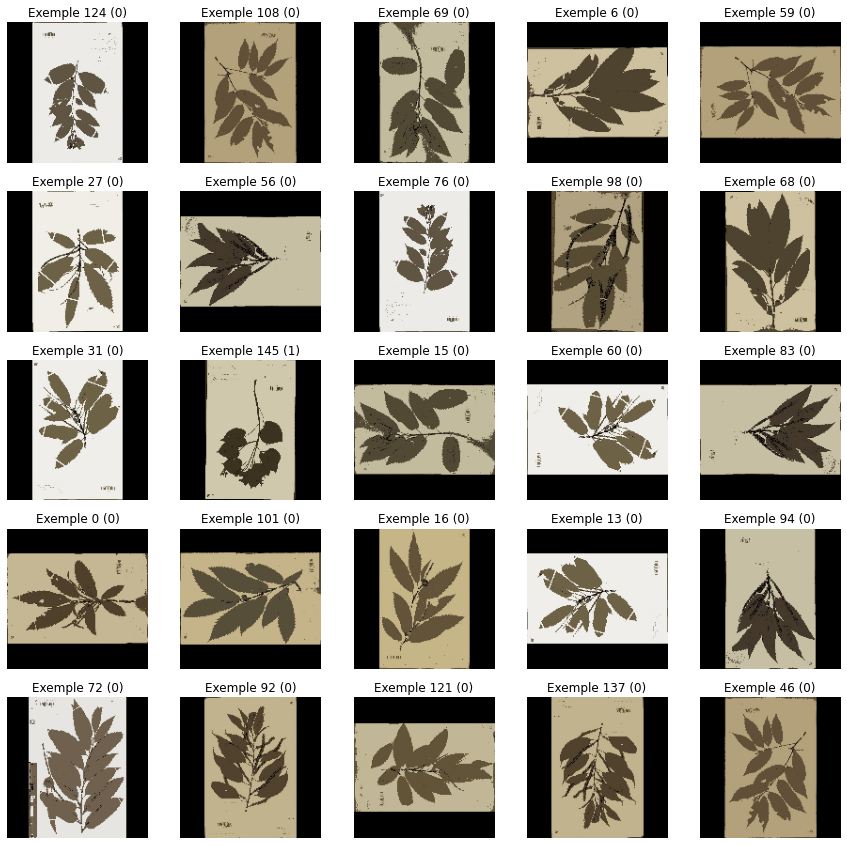

In [5]:
## Affichage des images originales

f, ax = plt.subplots(5, 5, figsize=(15, 15))
random_indexes = np.random.choice(images[0].shape[0], size=(5, 5), replace=False)

for i in range(5):
  for j in range(5):
    img_index = random_indexes[i, j]
    image = images[img_index]
    label = labels[img_index]

    ax[i, j].imshow(image)
    ax[i, j].set_title(f"Exemple {img_index} ({label})")
    ax[i, j].axis('off')

In [6]:
################################################ CONSTRUCTION DU MODELE ########################################

## Version COMPLEXE (fait de l'overfitting)

conv2d_params = dict(kernel_size=(3,3), activation="relu", kernel_initializer="orthogonal", padding="same")
dense_params = dict(activation="relu", kernel_initializer="orthogonal")


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(200, input_shape=(150, 150, 3), **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(200, **dense_params))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(100, **dense_params))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(50, **dense_params))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(11,
                             activation="softmax",
                             kernel_initializer="orthogonal"))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#model.summary()

In [136]:
## Version SIMPLE

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(nodes,
                              kernel_size=(3, 3),
                              activation="relu",
                              input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(nodes, activation="softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#model.summary()

Epoch 1/40
9/9 [==============================] - 1s 56ms/step - loss: 32.9474 - accuracy: 0.5807 - val_loss: 5.5048 - val_accuracy: 0.9048
Epoch 2/40
9/9 [==============================] - 0s 33ms/step - loss: 11.3626 - accuracy: 0.6744 - val_loss: 3.8214 - val_accuracy: 0.8420
Epoch 3/40
9/9 [==============================] - 0s 31ms/step - loss: 8.2083 - accuracy: 0.6725 - val_loss: 4.2077 - val_accuracy: 0.7619
Epoch 4/40
9/9 [==============================] - 0s 30ms/step - loss: 6.4206 - accuracy: 0.7180 - val_loss: 2.7905 - val_accuracy: 0.8528
Epoch 5/40
9/9 [==============================] - 0s 27ms/step - loss: 5.7943 - accuracy: 0.7115 - val_loss: 4.6438 - val_accuracy: 0.7165
Epoch 6/40
9/9 [==============================] - 0s 30ms/step - loss: 4.1923 - accuracy: 0.7412 - val_loss: 3.6523 - val_accuracy: 0.7662
Epoch 7/40
9/9 [==============================] - 0s 28ms/step - loss: 3.4224 - accuracy: 0.7644 - val_loss: 4.8584 - val_accuracy: 0.6970
Epoch 8/40
9/9 [=========

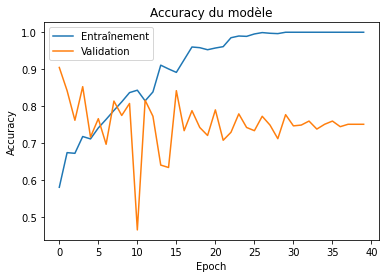

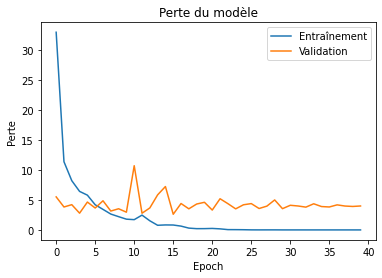

In [137]:
################################################ APPRENTISSAGE ########################################

# Apprentissage du modèle
images=np.array(images)
labels=np.array(labels)


training = model.fit(images, labels, epochs=ep+10, batch_size=128, validation_split=0.30)


# Visualisation des métriques d'entrainement
def plot_metrics(history) -> None:
  plt.plot(training.history["accuracy"])
  plt.plot(training.history["val_accuracy"])
  plt.title("Accuracy du modèle")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(["Entraînement", "Validation"], loc="upper left")
  plt.show()

  plt.plot(training.history["loss"])
  plt.plot(training.history["val_loss"])
  plt.title("Perte du modèle")
  plt.ylabel("Perte")
  plt.xlabel("Epoch")
  plt.legend(["Entraînement", "Validation"], loc="upper right")
  plt.show()


plot_metrics(training.history)

In [138]:
## Evaluation du modèle
test_images, test_labels = get_images(path_test_data, feature)
model.evaluate(np.array(test_images), np.array(test_labels), verbose=1)

4/4 [==============================] - 0s 6ms/step - loss: 4.3262 - accuracy: 0.7727


[4.3261919021606445, 0.7727272510528564]

4/4 [==============================] - 0s 5ms/step


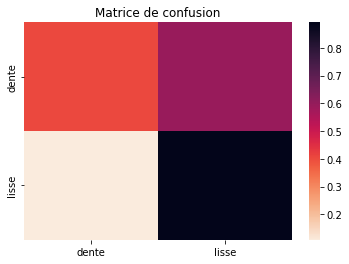

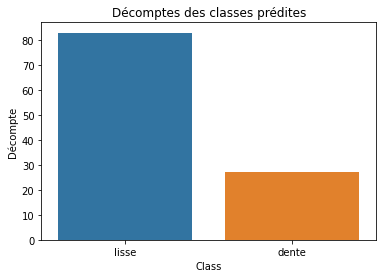

In [139]:
## Analyse des erreurs

def analyze_preds(preds, labels, label_names):
  confusion_matrix = sklearn.metrics.confusion_matrix(preds,
                                                      labels,
                                                      normalize="true")
  seaborn.heatmap(confusion_matrix,
                  cmap="rocket_r",
                  xticklabels=label_names,
                  yticklabels=label_names)
  plt.title("Matrice de confusion")
  plt.show()

  seaborn.countplot(x=list(map(lambda x: label_names[x], preds)))
  plt.title("Décomptes des classes prédites")
  plt.ylabel("Décompte")
  plt.xlabel("Class")
  plt.show()


test_pred = np.argmax(model.predict(np.array(test_images)), axis=-1)
analyze_preds(test_pred, test_labels, label_names1)

Prédiction : 1, classe réelle : 0


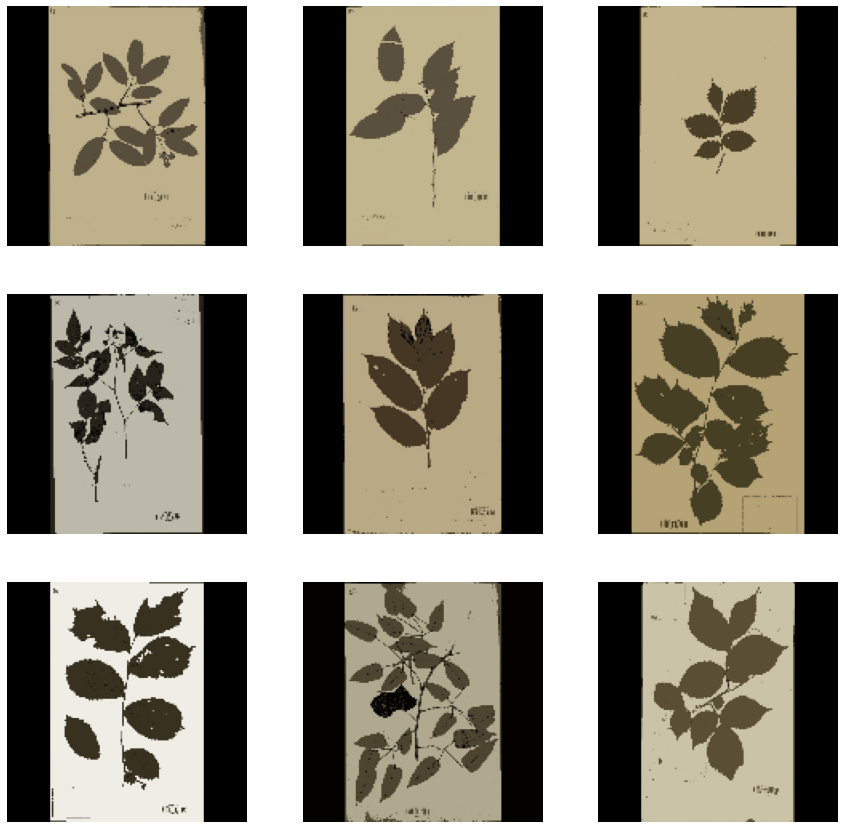

Valeurs prédites par notre modèle :
[1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1]

Valeurs réelles :
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
def plot_mistakes(predicted_class: str, true_class: str) -> None:
  print(f"Prédiction : {predicted_class}, classe réelle : {true_class}")
  mistakes=[]

  for index, image in enumerate(test_images):
    if (test_pred[index] == predicted_class) and (test_labels[index] == true_class):
      mistakes.append(image)
  

  random_indexes = np.random.choice(len(mistakes),
                                       size=min(len(mistakes), 9),
                                       replace=False)
  grid_indexes = itertools.product(range(3), repeat=2)

  _, ax = plt.subplots(3, 3, figsize=(15, 15))
  for img_index, (i, j) in zip(random_indexes, grid_indexes):
    ax[i, j].imshow(mistakes[img_index])
    ax[i, j].axis("off")
  plt.show()
  

# On plot quelques unes des images prédites lisses (=1) alors qu'elles sont dentées (=0)
plot_mistakes(1, 0)
print("Valeurs prédites par notre modèle :")
print(test_pred)
print("\nValeurs réelles :")
print(test_labels)

#                                                      MODELE 2 : Phyllotaxie

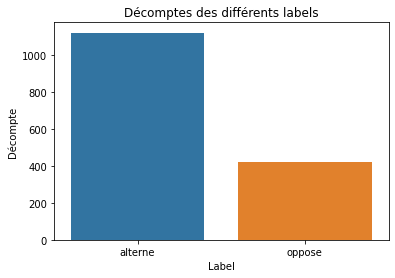

In [12]:
################################################ MODELE 2 : Phyllotaxie ##############################################

## CHOIX DE LA FEATURE :
label_names = label_names2
feature = "phyllotaxie"


images, labels= get_images(path_train_data, feature)

seaborn.countplot(x=data_train_labeled[feature])
plt.title("Décomptes des différents labels")
plt.ylabel("Décompte")
plt.xlabel("Label")
plt.show()

In [124]:
################################################ CONSTRUCTION DU MODELE ########################################


## Modèle version SIMPLE

model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(nodes+10,
                              kernel_size=(3, 3),
                              activation="relu",
                              input_shape=(150, 150, 3)))
model2.add(keras.layers.MaxPool2D(3,3))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(nodes+10, activation="softmax"))
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#model2.summary()

Epoch 1/35
9/9 [==============================] - 1s 59ms/step - loss: 22.2720 - accuracy: 0.5853 - val_loss: 2.7494 - val_accuracy: 0.7922
Epoch 2/35
9/9 [==============================] - 0s 38ms/step - loss: 4.6567 - accuracy: 0.6837 - val_loss: 5.1349 - val_accuracy: 0.5909
Epoch 3/35
9/9 [==============================] - 0s 37ms/step - loss: 4.1144 - accuracy: 0.7134 - val_loss: 2.0533 - val_accuracy: 0.8182
Epoch 4/35
9/9 [==============================] - 0s 36ms/step - loss: 2.5709 - accuracy: 0.7412 - val_loss: 2.0870 - val_accuracy: 0.8203
Epoch 5/35
9/9 [==============================] - 0s 37ms/step - loss: 2.0039 - accuracy: 0.7894 - val_loss: 3.3149 - val_accuracy: 0.6645
Epoch 6/35
9/9 [==============================] - 0s 38ms/step - loss: 1.4088 - accuracy: 0.8312 - val_loss: 3.3870 - val_accuracy: 0.6515
Epoch 7/35
9/9 [==============================] - 0s 39ms/step - loss: 1.3080 - accuracy: 0.8432 - val_loss: 2.3896 - val_accuracy: 0.7771
Epoch 8/35
9/9 [==========

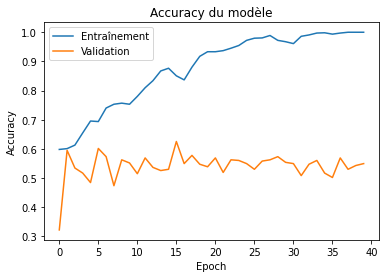

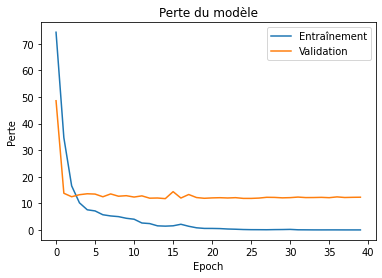

In [125]:
################################################ APPRENTISSAGE ########################################

# Apprentissage du modèle
images=np.array(images)
labels=np.array(labels)


training2 = model2.fit(images, labels, epochs=ep+5, batch_size=128, validation_split=0.30)


# Visualisation des métriques d'entrainement

plot_metrics(training2.history)

In [126]:
## Evaluation du modèle
test_images, test_labels = get_images(path_test_data, feature)
model2.evaluate(np.array(test_images), np.array(test_labels), verbose=1)

4/4 [==============================] - 0s 6ms/step - loss: 2.2351 - accuracy: 0.7636


[2.2351255416870117, 0.7636363506317139]

4/4 [==============================] - 0s 5ms/step


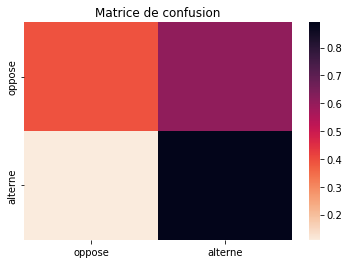

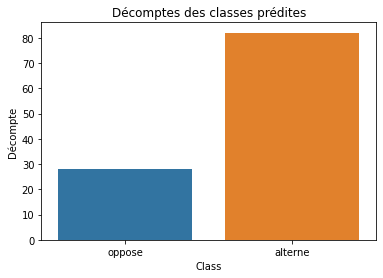

In [127]:
## Analyse des erreurs

test_pred2 = np.argmax(model2.predict(np.array(test_images)), axis=-1)
analyze_preds(test_pred2, test_labels, label_names2)

#                                                      MODELE 3 : Type de feuille

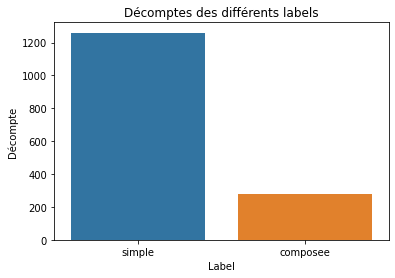

In [17]:
################################################ MODELE 3 : Type de feuille ##############################################

## CHOIX DE LA FEATURE :
label_names = label_names3
feature = "type_feuille"



images, labels= get_images(path_train_data, feature)

seaborn.countplot(x=data_train_labeled[feature])
plt.title("Décomptes des différents labels")
plt.ylabel("Décompte")
plt.xlabel("Label")
plt.show()

In [75]:
################################################ CONSTRUCTION DU MODELE ########################################


## Modèle version SIMPLE

model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(nodes,
                              kernel_size=(3, 3),
                              activation="relu",
                              input_shape=(150, 150, 3)))
model3.add(keras.layers.MaxPool2D(3,3))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(nodes, activation="softmax"))
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#model3.summary()

Epoch 1/35
9/9 [==============================] - 1s 56ms/step - loss: 33.3213 - accuracy: 0.6122 - val_loss: 8.5819 - val_accuracy: 0.8312
Epoch 2/35
9/9 [==============================] - 0s 33ms/step - loss: 13.7828 - accuracy: 0.6596 - val_loss: 6.5703 - val_accuracy: 0.8961
Epoch 3/35
9/9 [==============================] - 0s 29ms/step - loss: 10.6699 - accuracy: 0.6827 - val_loss: 4.1689 - val_accuracy: 0.8680
Epoch 4/35
9/9 [==============================] - 0s 28ms/step - loss: 7.8316 - accuracy: 0.6957 - val_loss: 2.7867 - val_accuracy: 0.8247
Epoch 5/35
9/9 [==============================] - 0s 28ms/step - loss: 4.9089 - accuracy: 0.7282 - val_loss: 3.5179 - val_accuracy: 0.7316
Epoch 6/35
9/9 [==============================] - 0s 29ms/step - loss: 3.8370 - accuracy: 0.7412 - val_loss: 2.4962 - val_accuracy: 0.7835
Epoch 7/35
9/9 [==============================] - 0s 27ms/step - loss: 2.9770 - accuracy: 0.7755 - val_loss: 2.0742 - val_accuracy: 0.8160
Epoch 8/35
9/9 [========

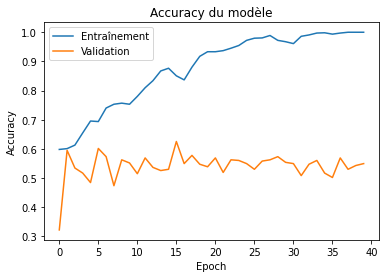

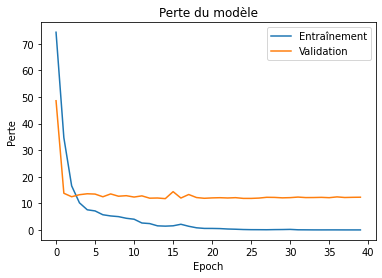

In [76]:
################################################ APPRENTISSAGE ########################################

# Apprentissage du modèle
images=np.array(images)
labels=np.array(labels)


training3 = model3.fit(images, labels, epochs=ep+5, batch_size=128, validation_split=0.30)


# Visualisation des métriques d'entrainement
plot_metrics(training3.history)

In [77]:
## Evaluation du modèle
test_images, test_labels = get_images(path_test_data, feature)
model3.evaluate(np.array(test_images), np.array(test_labels), verbose=1)

4/4 [==============================] - 0s 6ms/step - loss: 3.4295 - accuracy: 0.7455


[3.4294846057891846, 0.7454545497894287]

4/4 [==============================] - 0s 4ms/step


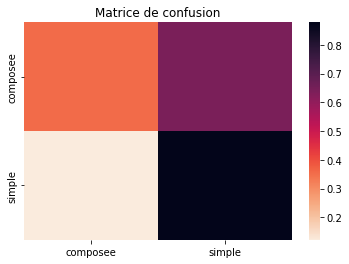

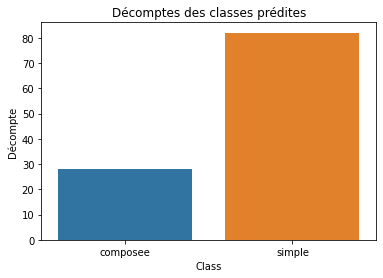

In [78]:
## Analyse des erreurs

test_pred3 = np.argmax(model3.predict(np.array(test_images)), axis=-1)
analyze_preds(test_pred3, test_labels, label_names3)

  #  MODELE 4 : Ligneux

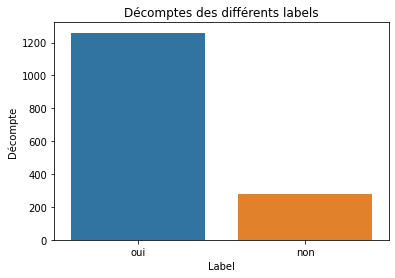

In [47]:
################################################ MODELE 4 : Feuille ligneuse ##############################################

## CHOIX DE LA FEATURE :
label_names = label_names4
feature = "ligneux"



images, labels= get_images(path_train_data, feature)

seaborn.countplot(x=data_train_labeled[feature])
plt.title("Décomptes des différents labels")
plt.ylabel("Décompte")
plt.xlabel("Label")
plt.show()

In [118]:
################################################ CONSTRUCTION DU MODELE ########################################


## Modèle version SIMPLE

model4 = keras.models.Sequential()
model4.add(keras.layers.Conv2D(nodes,
                              kernel_size=(3, 3),
                              activation="relu",
                              input_shape=(150, 150, 3)))
model4.add(keras.layers.MaxPool2D(3,3))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(nodes, activation="softmax"))
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#model4.summary()

Epoch 1/40
9/9 [==============================] - 1s 54ms/step - loss: 45.4242 - accuracy: 0.5204 - val_loss: 5.0589 - val_accuracy: 0.7727
Epoch 2/40
9/9 [==============================] - 0s 29ms/step - loss: 8.8249 - accuracy: 0.6716 - val_loss: 4.6895 - val_accuracy: 0.7900
Epoch 3/40
9/9 [==============================] - 0s 29ms/step - loss: 8.0220 - accuracy: 0.6809 - val_loss: 5.5901 - val_accuracy: 0.6861
Epoch 4/40
9/9 [==============================] - 0s 30ms/step - loss: 6.0497 - accuracy: 0.7115 - val_loss: 8.8678 - val_accuracy: 0.5390
Epoch 5/40
9/9 [==============================] - 0s 28ms/step - loss: 5.8144 - accuracy: 0.7041 - val_loss: 12.7853 - val_accuracy: 0.4481
Epoch 6/40
9/9 [==============================] - 0s 28ms/step - loss: 5.1476 - accuracy: 0.7217 - val_loss: 6.8340 - val_accuracy: 0.6342
Epoch 7/40
9/9 [==============================] - 0s 28ms/step - loss: 5.0643 - accuracy: 0.7347 - val_loss: 6.9009 - val_accuracy: 0.6797
Epoch 8/40
9/9 [=========

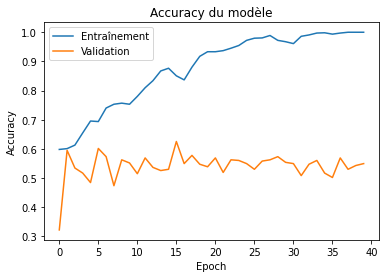

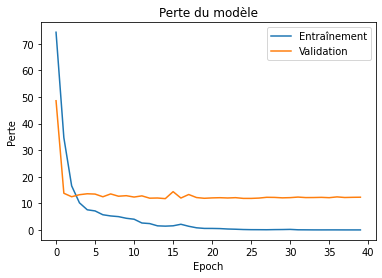

In [119]:
################################################ APPRENTISSAGE ########################################

# Apprentissage du modèle
images=np.array(images)
labels=np.array(labels)


training4 = model4.fit(images, labels, epochs=ep+10, batch_size=128, validation_split=0.30)


# Visualisation des métriques d'entrainement
plot_metrics(training4.history)

In [120]:
## Evaluation du modèle
test_images, test_labels = get_images(path_test_data, feature)
model4.evaluate(np.array(test_images), np.array(test_labels), verbose=1)

4/4 [==============================] - 0s 5ms/step - loss: 6.6787 - accuracy: 0.7455


[6.678650856018066, 0.7454545497894287]

4/4 [==============================] - 0s 5ms/step


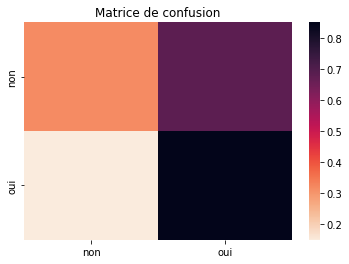

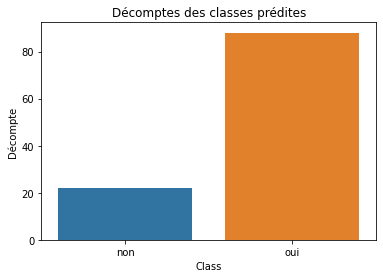

In [121]:
## Analyse des erreurs
test_pred4 = np.argmax(model4.predict(np.array(test_images)), axis=-1)
analyze_preds(test_pred4, test_labels, label_names4)

# CONCLUSION des performances

In [140]:
print("Précision du modèle Bords :")
model.evaluate(np.array(test_images), np.array(test_labels), verbose=1)


print("\nPrécision du modèle Phyllotaxie :")
model2.evaluate(np.array(test_images), np.array(test_labels), verbose=1)


print("\nPrécision du modèle Type de feuille :")
model3.evaluate(np.array(test_images), np.array(test_labels), verbose=1)


print("\nPrécision du modèle Ligneux :")
model4.evaluate(np.array(test_images), np.array(test_labels), verbose=1)

Précision du modèle Bords :
4/4 [==============================] - 0s 5ms/step - loss: 4.3262 - accuracy: 0.7727

Précision du modèle Phyllotaxie :
4/4 [==============================] - 0s 6ms/step - loss: 2.2351 - accuracy: 0.7636

Précision du modèle Type de feuille :
4/4 [==============================] - 0s 5ms/step - loss: 3.4295 - accuracy: 0.7455

Précision du modèle Ligneux :
4/4 [==============================] - 0s 5ms/step - loss: 6.6787 - accuracy: 0.7455


[6.678650856018066, 0.7454545497894287]

Matrice de confusion du modèle Bords


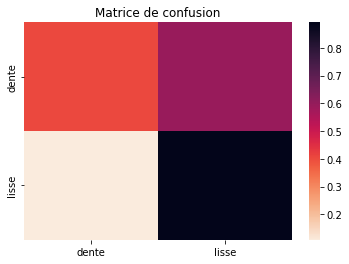

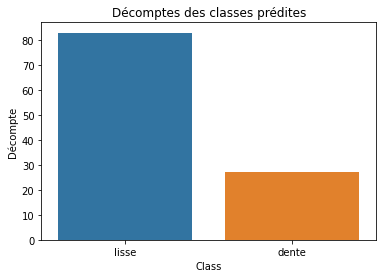


Matrice de confusion du modèle Phyllotaxie


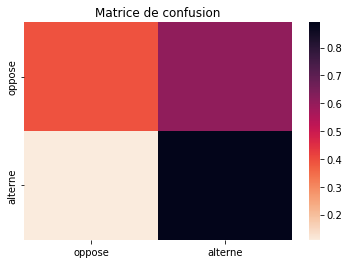

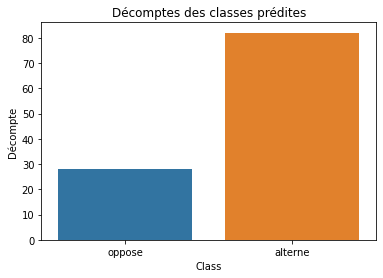


Matrice de confusion du modèle Type de feuille


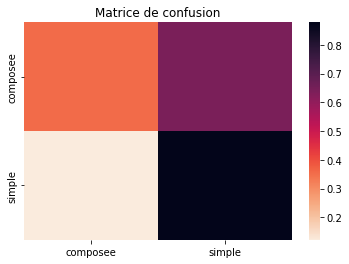

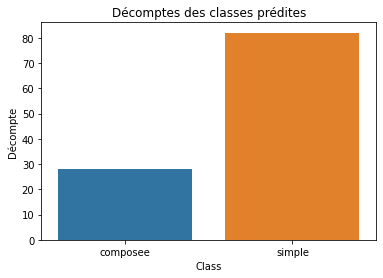


Matrice de confusion du modèle Ligneux


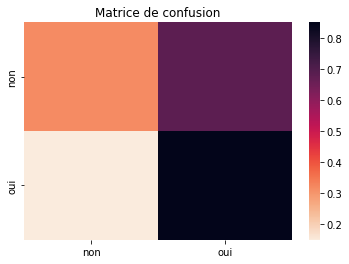

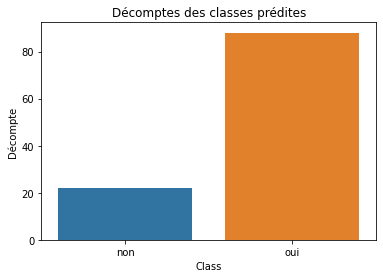

In [141]:
##### Résumé des matrices de confusion

print("Matrice de confusion du modèle Bords")
analyze_preds(test_pred, test_labels, label_names1)

print("\nMatrice de confusion du modèle Phyllotaxie")
analyze_preds(test_pred2, test_labels, label_names2)

print("\nMatrice de confusion du modèle Type de feuille")
analyze_preds(test_pred3, test_labels, label_names3)

print("\nMatrice de confusion du modèle Ligneux")
analyze_preds(test_pred4, test_labels, label_names4)